<a href="https://colab.research.google.com/github/elishaaquino/KickstarterAnalysis/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Kickstarter Projects

My family and I have always enjoyed playing board and party games and are always on the hunt for new ones. We especially enjoy playing Exploding Kittens, the most-backed Kickstarter project of all time (219,382 backers). So, I was curious as to whether or not certain factors went into whether or not a project would be successfully funded or not. 

We always wondered how Kickstarter projects are able to attract audience to fund their ideas. Is it dependent on the categories they are in? Are they more likely to succeed if they are featured by a Kickstarter staff? Do projects with lower funding goals succed more than projects with higher funding goals? Let's explore the data on the past projects we have collected.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import *

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_projects = pd.read_csv(
    "/content/drive/My Drive/DATA301 Final Project/pastProjects.csv",
    index_col=0)

In [3]:
df_projects = df_projects[df_projects["state"] != "live"]
df_projects.reset_index(inplace=True)
df_projects.drop(columns=["index"], inplace=True)
df_projects.head()

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,spotlight,staff_pick,state,usd_pledged,Parent Category,Category Name,Location,Location Type,Amount of Time Live
0,25,Provocative. Timeless. This project symbolize...,US,2012-02-29 12:12:00,USD,2012-04-13 07:18:23,1190.0,2012-03-14 07:18:23,The Vault,1547.0,True,False,successful,1547.000000,music,Hip-Hop,Lancaster,Town,30.000000
1,5,"Perfectly preserved herbs, for when fresh herb...",CA,2016-02-09 04:33:21,CAD,2016-06-23 00:55:20,5000.0,2016-05-09 00:55:20,Freeze dried herbs,195.0,False,False,failed,151.107737,food,Small Batch,Victoria,Town,45.000000
2,7,"Live events centered around women. Poetry, mus...",US,2016-04-25 06:39:02,USD,2016-06-15 22:09:46,5000.0,2016-05-16 22:09:46,TOAST,235.0,False,False,failed,235.000000,art,Performance Art,Los Angeles,Town,30.000000
3,15,The 2nd Annual MAC PAC Sponsored Exhibition fe...,US,2014-09-22 02:26:09,USD,2014-11-07 00:44:50,1500.0,2014-10-16 23:44:50,CURRENT OBSESSIONS an Exhibition by Christophe...,1710.0,True,False,successful,1710.000000,art,Mixed Media,Dallas,Town,21.041667
4,1,Hour-long scripted drama TV pilot for a series...,US,2018-07-28 22:05:19,USD,2018-08-28 01:19:32,2450000.0,2018-07-29 01:19:32,ATF,1.0,False,False,failed,1.000000,film,Television,Atlanta,Town,30.000000


# About the Data




In [4]:
len(df_projects)

19449

In [5]:
#Number of unique countries 

print(df_projects['country'].value_counts())
print("\n Number of unique countries in this dataset")
print(df_projects['country'].nunique())


US    13830
GB     2103
CA      897
AU      488
DE      296
FR      253
MX      229
IT      228
ES      173
NL      168
SE      128
DK       93
HK       93
NZ       92
SG       74
CH       72
IE       57
AT       48
NO       47
BE       46
JP       31
LU        3
Name: country, dtype: int64

 Number of unique countries in this dataset
22


In [6]:
#Number of unique location 

print(df_projects['Location'].value_counts())
print("\n Number of unique location/city in this dataset")
print(df_projects['Location'].nunique())

Los Angeles         891
New York            690
London              685
Chicago             367
San Francisco       348
                   ... 
Petworth              1
Maquoketa             1
Snowmass Village      1
Whitefish Bay         1
Southbourne           1
Name: Location, Length: 3592, dtype: int64

 Number of unique location/city in this dataset
3592


In [7]:
#Project years 
years = df_projects['created_at'].str.split("-").str[0]

years.value_counts()

2018    3771
2015    3732
2017    3041
2016    2939
2014    2859
2013    1141
2012     899
2019     444
2011     443
2010     140
2009      40
Name: created_at, dtype: int64

**This dataset represent 19449 projects from 22 unique countries and 3592 cities around the world dating from 2009 to 2019.**

# Examining Categories


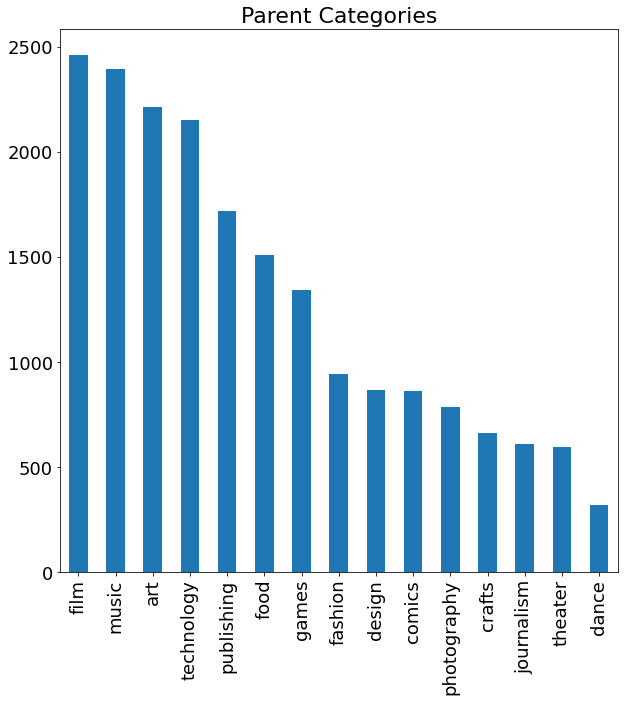

In [8]:
df_projects["Parent Category"].value_counts().plot.bar(
    figsize= (10,10),
    fontsize = 18,
    title = "Parent Categories").title.set_size(22)

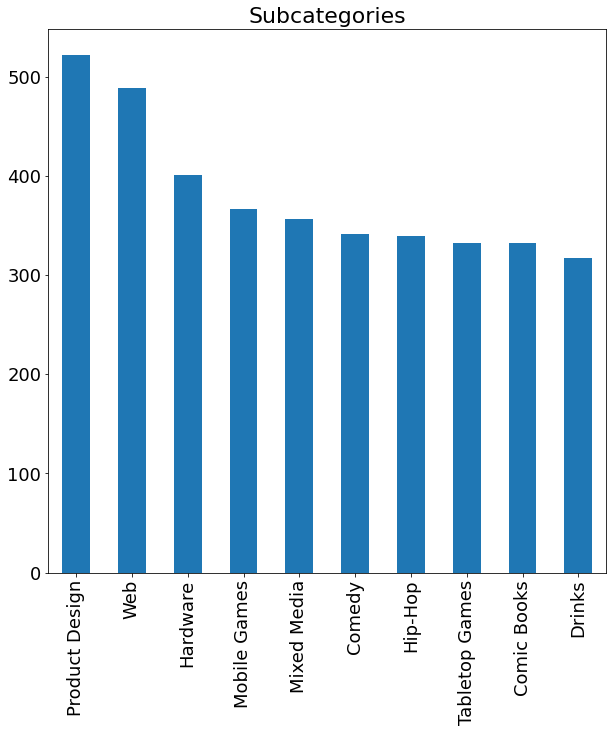

In [9]:
df_projects["Category Name"].value_counts()[0:10].plot.bar(
     figsize= (10,10),
    fontsize = 18,
    title = "Subcategories").title.set_size(22)


**It seems like most projects are entertainment related with arts and design being the predominant field.** 

**Lets get their actual values and quantify the disparity.**

In [10]:
df_projects["Parent Category"].value_counts(sort = True)

film           2462
music          2394
art            2212
technology     2151
publishing     1719
food           1508
games          1344
fashion         944
design          869
comics          863
photography     789
crafts          662
journalism      611
theater         598
dance           323
Name: Parent Category, dtype: int64

In [11]:
df_projects["Category Name"].value_counts(sort=True).head(10)

Product Design    522
Web               489
Hardware          401
Mobile Games      367
Mixed Media       356
Comedy            341
Hip-Hop           339
Tabletop Games    332
Comic Books       332
Drinks            317
Name: Category Name, dtype: int64

**We know the top 3 categories of Kickstarter campaigns are entertainment related (film, art, music) with product design being the most popular subcategory. Does that mean the more popular categories would have higher funding requests in general?**

**Let's examine how much funding each major categories ask for in general.**



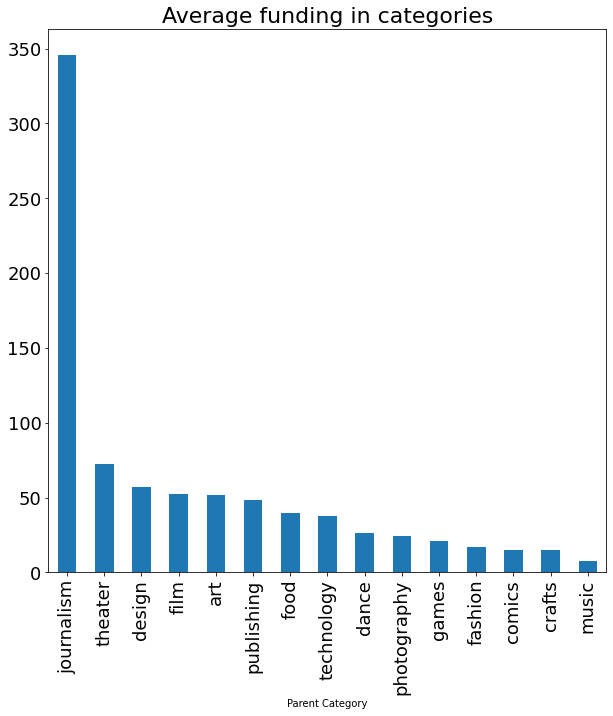

In [12]:
category_count = df_projects.groupby("Parent Category")["Parent Category"].count()
goal_distribution = (df_projects.groupby("Parent Category")["goal"].mean()/
                     category_count)

goal_distribution.sort_values(ascending= False).plot.bar(figsize= (10,10),
    fontsize = 18,
    title = "Average funding in categories").title.set_size(22)

**Surprisingly enough, journalism related Kickstarters request for the most funding on average, closely followed by other popular categories of film and art. Interestingly our 2nd most popular category, music, is ranked last in terms of the average funding requested.** 

**What about the success rate among the categories? Let's see how projects do among the different categories.**


**First let's see what are the available phases of projects are.**

In [13]:
df_projects["state"].value_counts()

successful    11133
failed         7477
canceled        781
suspended        58
Name: state, dtype: int64

**Apparently Kickstarter projects are not only in success or fail state, but can also be in cancelled or suspended state. We will count cancelled and suspended as failure for our analysis of success.** 

**Let's plot the success rate between categories and arrange by highest sucess rate.** 

In [0]:
df_projects["state"].replace("canceled", "failed", inplace=True)
df_projects["state"].replace("suspended", "failed", inplace=True)

In [15]:
df_projects.groupby(["Parent Category"])["state"].value_counts(
    normalize = True).unstack().sort_values(["successful"], ascending = False)

state,failed,successful
Parent Category,,
comics,0.169177,0.830823
design,0.214039,0.785961
theater,0.247492,0.752508
publishing,0.261780,0.738220
dance,0.269350,0.730650
music,0.348789,0.651211
photography,0.406844,0.593156
games,0.421131,0.578869
fashion,0.427966,0.572034


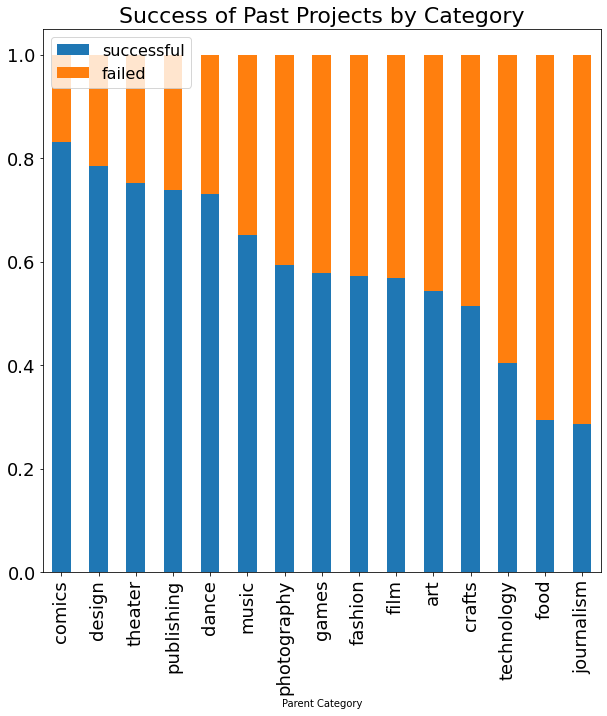

In [16]:
df_success = df_projects.groupby(["Parent Category"])["state"].value_counts(
    normalize = True).unstack()

df_success = df_success[['successful'] + [ col for col in df_success.columns if col != 'successful' ]]

cols = df_projects["state"].map({
    "successful" : "Green",
    "failed" : "Red"
})

df_success.sort_values(by = ["successful"], ascending = False).plot(
    kind='bar', stacked=True,
    figsize = (10,10),
    fontsize = 18,
    title = "Success of Past Projects by Category").title.set_size(22)

plt.legend(loc = 2, prop={'size': 16})

plt.show()

**We can see that comics, design and theater are the top 3 categories that have over 75% of their projects fully funded and supported.**

**Also, note that journalism, which has a much hgiher funding request on average, has the lowest success rate.**


# Examining Goals

**Now let's ask this question, are certain projects less likely to be supported or backed based off of the funding that is requested? Logically speaking, the higher the funding goal is, the harder it is to get the projects to be fully funded. It would require a lot of backers to fund a projects seeking 10 million dollars.**

**Also, based off of our analysis of funding and sucess rate among categories, we see that comics is the category with most successfully funded projects AND the category with third least amount of funding asked on average. With this, we hypothesize that there is a negative relation between success rate of a project and the funding amount requested of a project in each category. The more money a project asks for, the less likely it is to be successful and fully funded.** 

**Let's explore this hypothesis by plotting the succes of projects with each project's funding requested on our Y-axis and the amount of time live in the X axis.**


**Since funding goals are quantative data, let's convert it into categorical data with range of funding amount asked as categories.** 

In [0]:
def f(row):
    goal = row['goal']
    if goal < 10000 :
        val = "under 10k"
    elif 10000 < goal and goal <= 50000:
        val = "10 to 50k"
    elif 50000 < goal and goal <= 100000:
        val = "50 to 100k"
    elif 100000 < goal and goal <= 250000:
        val = "100 to 250k"
    elif 250000 < goal and goal <= 500000:
        val = "250 to 500k"
    elif 500000 < goal and goal <= 1000000:
        val =  "500 to 1m"
    elif 1000000 < goal and goal <= 2500000:
        val = "1m to 2.5m"
    elif 2500000 < goal and goal <= 5000000:
        val = "2.5m to 5m"
    else:
        val = "5m+"
    return val

df_projects['goal range'] = df_projects.apply(f ,axis=1)

**Now we can group the projects by their goal range and find out if there's relation between amount of money asked and percentage of successful projects.**

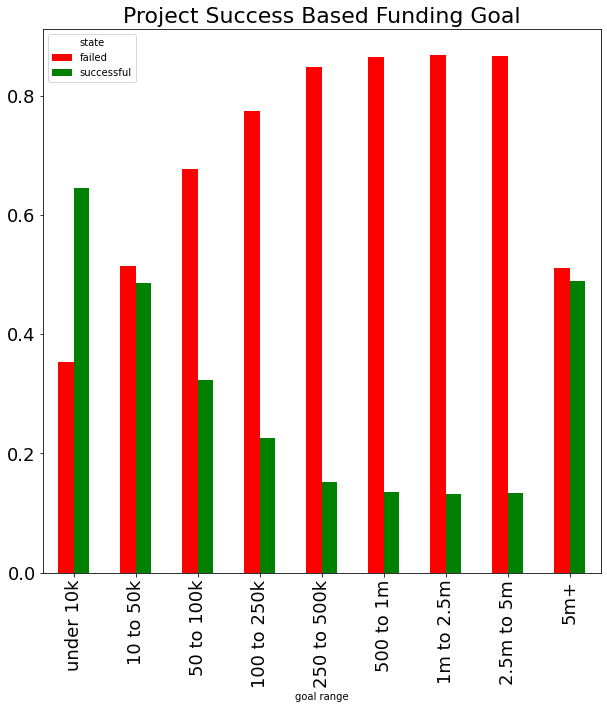

In [18]:

df_reindexed = df_projects.groupby("goal range")["state"].value_counts(
    normalize=True).unstack().reindex(['under 10k', "10 to 50k","50 to 100k",
                                      "100 to 250k", "250 to 500k", "500 to 1m",
                                      "1m to 2.5m", "2.5m to 5m", "5m+" ])

df_reindexed.plot.bar(
    figsize= (10,10),
    fontsize = 18,
    color = ["red", "green"],
    title = "Project Success Based Funding Goal").title.set_size(22)


**We can see that the project success percentage goes down when the requested funding gets higher. Surprisingly this is not the case for projects with $5 million or more funding requested. Maybe the likelihood of project success is dependent on the number of pledger/backers as well. If the goal is high and the amount of supporters is quantatively large as well, a project may reach its funding goal and become a successful project**

**Let's do a scatterplot between funding goal and the number of backers to see the success of projects. Green scatter points indicate successful project while red scatter point indicate failure.** 

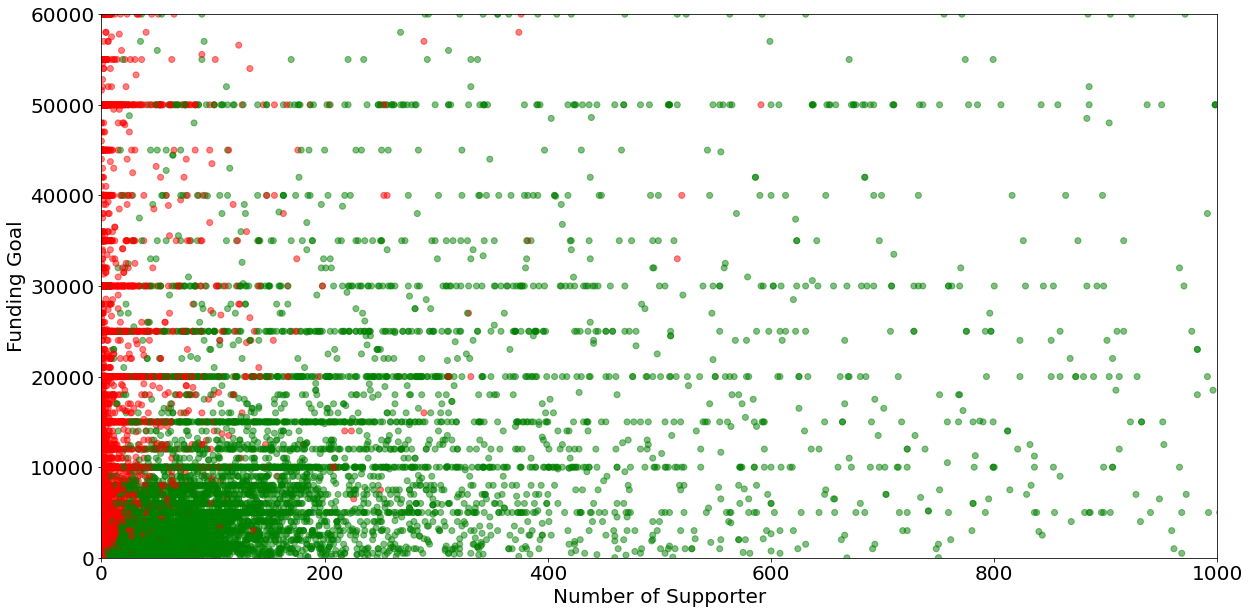

In [19]:

cols = df_projects["state"].map({
    "successful" : "Green",
    "failed" : "Red"
})


'''
df_projects.plot.scatter(x = "backers_count",  y = "goal",
                        c=cols, norm = True) 
'''


plt.rcParams.update({'font.size': 20})

backers = df_projects['backers_count']
goal = df_projects["goal"]

plt.figure(figsize=(20,10))
plt.scatter(x = backers, y = goal,
                       c=cols, norm = True, alpha = .5) 

plt.xlabel("Number of Supporter")
plt.ylabel("Funding Goal")
plt.xlim(0, 1000)
plt.ylim(0, 60000)

plt.show()


**We can see that projects are more likely to succeed if there are high number of supporters despite high funding goal. Is this true across all categories? Let's do a scatterplot for individual categories to find out**

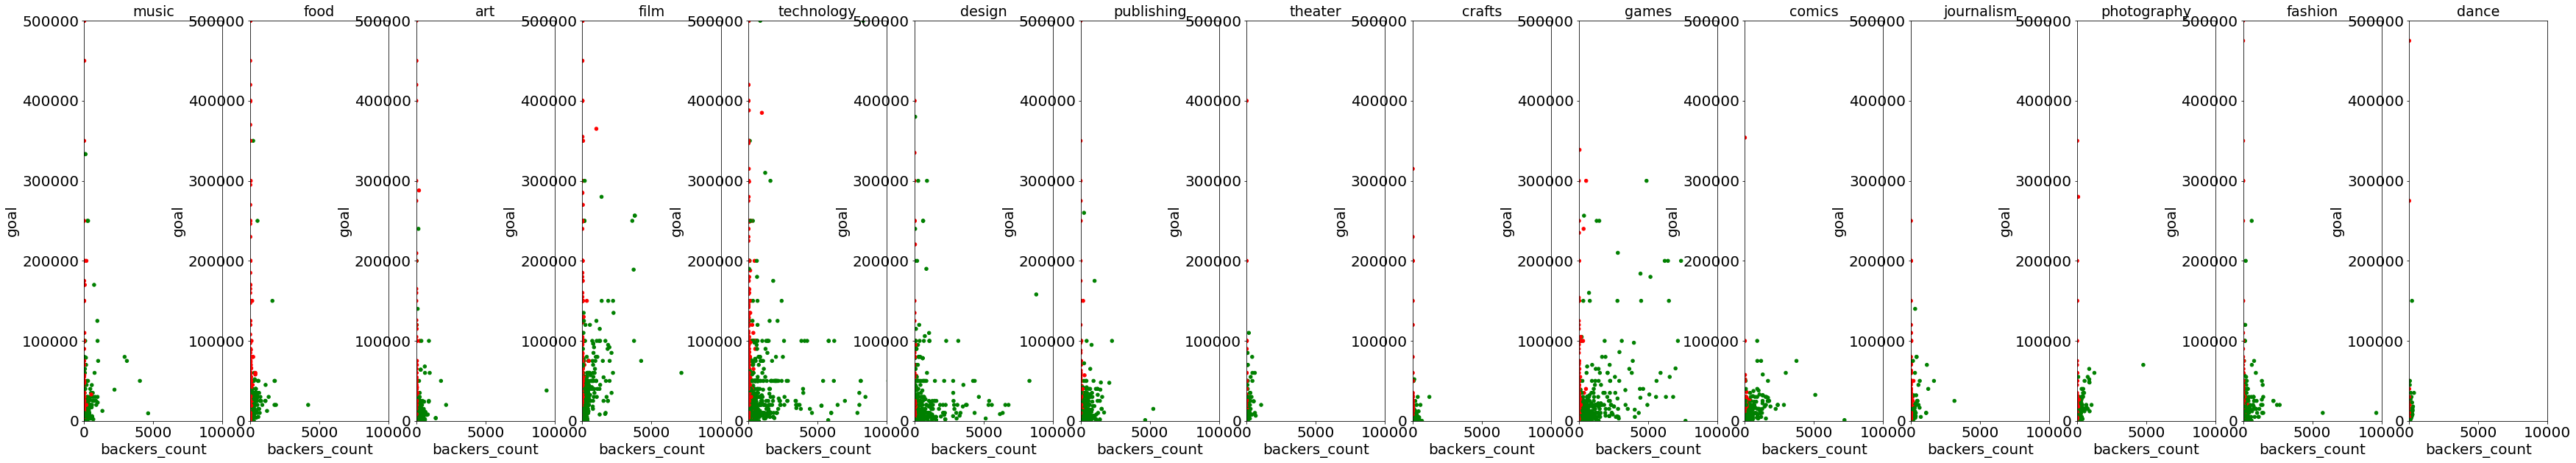

In [20]:
fig, axes = plt.subplots(1, 15, figsize=(60, 10))


categories = df_projects["Parent Category"].unique()

plt.rcParams.update({'font.size': 16})

for ax, categories in zip(axes, categories):
    df_project_categories = df_projects[df_projects["Parent Category"] == categories]

    cols = df_project_categories["state"].map({
        "successful" : "Green",
        "failed" : "Red"
    })

    (df_projects[df_projects["Parent Category"] == categories].
     plot.scatter(x="backers_count", y="goal", ax=ax, c= cols,
                  xlim= (0, 10000), ylim = (0, 500000)))
  
    ax.set_title(categories)

plt.show()

**It seems to be true across all categories that more backers there are, the more likely a project will become successful.**



**How does this pan out if we changed backers_count to the duration projects are up and live. Does how long a project campaign for have relation with funding goal and an affect on success rate?**

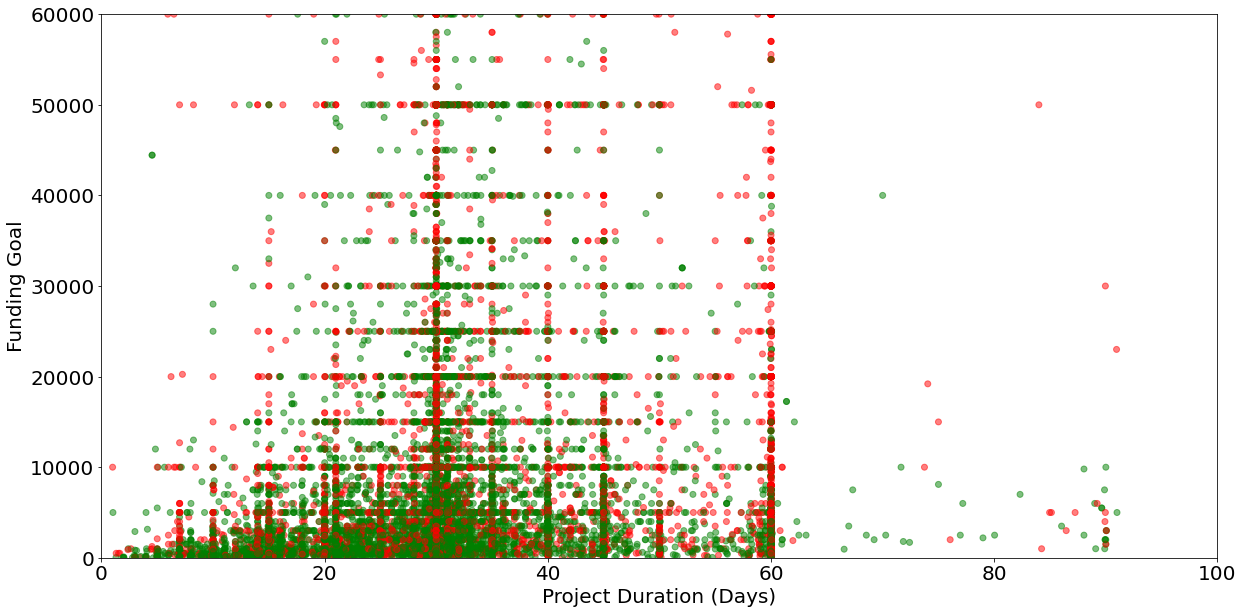

In [34]:

cols = df_projects["state"].map({
    "successful" : "Green",
    "failed" : "Red"
})


plt.rcParams.update({'font.size': 20})

upTime = df_projects['Amount of Time Live']
goal = df_projects["goal"]

plt.figure(figsize=(20,10))
plt.scatter(x = upTime, y = goal,
                       c=cols, norm = True, alpha = .5) 

plt.xlabel("Project Duration (Days)")
plt.ylabel("Funding Goal")
plt.xlim(0, 100)
plt.ylim(0, 60000)

plt.show()

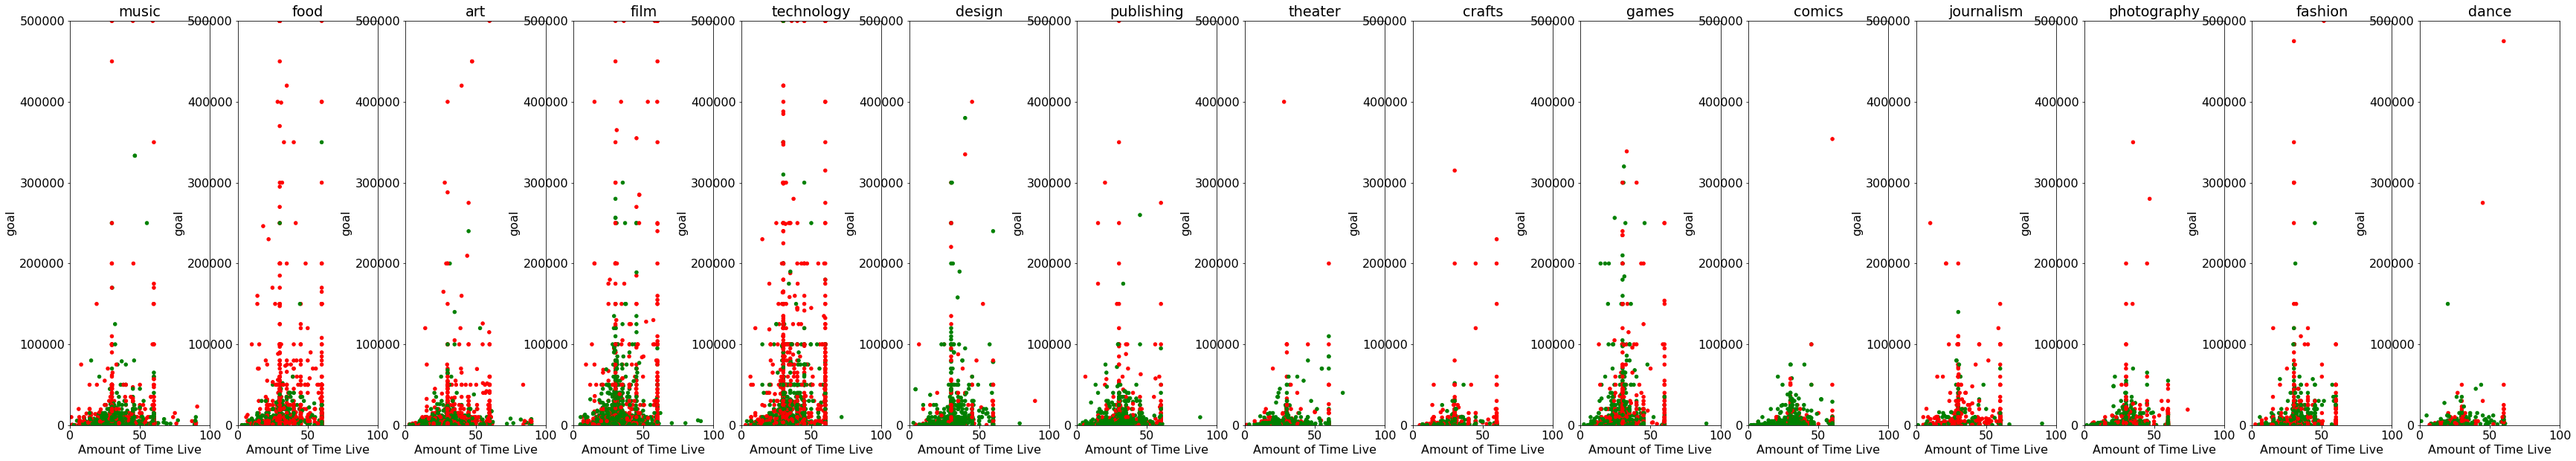

In [37]:
fig, axes = plt.subplots(1, 15, figsize=(60, 10))


categories = df_projects["Parent Category"].unique()

plt.rcParams.update({'font.size': 16})

for ax, categories in zip(axes, categories):
    df_project_categories = df_projects[df_projects["Parent Category"] == categories]

    cols = df_project_categories["state"].map({
        "successful" : "Green",
        "failed" : "Red"
    })

    (df_projects[df_projects["Parent Category"] == categories].
     plot.scatter(x="Amount of Time Live", y="goal", ax=ax, c= cols,
                  xlim= (0, 100), ylim = (0, 500000)))
  
    ax.set_title(categories)

plt.show()

**It seems pretty scattered and there isn't relation between amount of time a project is up and its success rate**

# Examining Project Blurbs/Description

In [0]:
df_projects["Percent Funded"] = (df_projects["pledged"]
                                 /df_projects["goal"]) * 100

In [0]:
df_top_funded = df_projects.sort_values(by="Percent Funded",
                        ascending=False)[:1000]

In [24]:
from collections import Counter
import numpy as np

blurbs = df_top_funded["blurb"]

bag_of_words = (
    blurbs.
    str.lower().                  
    str.replace("[^\w\s]", " "). 
    str.split()    
).apply(Counter)

bag_of_words

13428    {'be': 1, 'ready': 1, 'for': 1, 'any': 1, 'occ...
2994     {'claustrophobia': 2, '1643': 1, 'is': 1, 'an'...
10112    {'do': 1, 'you': 1, 'want': 1, 'to': 1, 'save'...
6038     {'our': 1, '3rd': 1, 'book': 1, 'featuring': 1...
12599    {'a': 1, 'demon': 1, 'catcher': 1, 'from': 1, ...
                               ...                        
7343     {'the': 1, 'most': 1, 'sustainable': 1, 'zero'...
16650    {'a': 2, 'contemporary': 1, 'spin': 1, 'on': 1...
12021    {'beyond': 1, 'basics': 1, 'the': 1, 't': 2, '...
16847    {'i': 1, 'm': 1, 'making': 1, 'these': 1, 'cut...
4499     {'create': 1, 'mobile': 1, 'friendly': 1, 'dyn...
Name: blurb, Length: 1000, dtype: object

In [0]:
tf = pd.DataFrame(list(bag_of_words))

In [0]:
tf = tf.fillna(0)

df = (tf > 0).sum(axis=0)

idf = np.log(len(tf) / df)

tf_idf = tf * idf

In [0]:
freqs = tf_idf.sum(axis=0)

In [0]:
df_freqs = pd.DataFrame(freqs).reset_index().rename(
    columns={"index":"word", 0:"freq"}
)

In [29]:
# Filter out words with len < 4 because most of those words are not relevant
(df_freqs[df_freqs["word"].str.len() >= 4]
 .sort_values(by="freq",
              ascending=False)[:30])

,word,freq
8,your,387.305379
5,with,362.058433
137,that,251.033017
61,from,227.633204
93,world,202.593865
167,this,198.430689
587,pins,186.301600
178,game,185.229577
45,book,175.826619
586,enamel,171.618054


**From some of these words, you can get an idea of what the top projects are related to. The words "pins", "enamel", "game", "book", "series", and "card" enforce our belief that categories have an effect on success because those words are probably related to the design, art, and/or comics categories.**

# Examining Other Variables (Staff Pick, Spotlight, Country)


**How about other variables such as being favored by Kickstarter staff (staff_pick), being in the spotlight, or being from a certain country? Do these have any influence?**

In [30]:
pd.crosstab(df_projects["state"], df_projects["spotlight"])

spotlight,False,True
state,,
failed,8316,0
successful,0,11133


**It seems that being in the spotlight guarantees success.**

In [31]:
joint_state_staffpick = pd.crosstab(df_projects["state"], 
                                    df_projects["staff_pick"])

staff_pick = joint_state_staffpick.sum(axis=0)
joint_state_staffpick.divide(staff_pick, axis=1)

staff_pick,False,True
state,,
failed,0.474859,0.101826
successful,0.525141,0.898174


**It also seems that projects are more likely to succeed given that they are a staff pick.**

In [32]:
joint_state_country = pd.crosstab(df_projects["state"], df_projects["country"])
country = joint_state_country.sum(axis=0)
joint_state_country.divide(country, axis=1)

country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
state,,,,,,,,,,,,,,,,,,,,,,
failed,0.375,0.514344,0.630435,0.45262,0.486111,0.567568,0.44086,0.589595,0.454545,0.397527,0.193548,0.508772,0.622807,0.225806,0.0,0.49345,0.541667,0.510638,0.456522,0.476562,0.310811,0.416847
successful,0.625,0.485656,0.369565,0.54738,0.513889,0.432432,0.55914,0.410405,0.545455,0.602473,0.806452,0.491228,0.377193,0.774194,1.0,0.50655,0.458333,0.489362,0.543478,0.523438,0.689189,0.583153


**It seems that the chances of success does not have a lot to do with its country of origin. Although, there are some that are higher than 60% like HK, GB, JP, SG, and AT.**

# Conclusion 

**The features that seem to impact a project's success are goals, parent category, backer_count, amount_of_time_live, and staff_pick (projects picked to be featured by Kickstarter staff)**